In [2]:
import numpy as np
import matplotlib.pylab as plt

In [7]:
import sys
sys.path.append('..')
from fit_peak import fit_peak

In [2]:
!ls ./

2019_04_sinus2psi_Nb112_Cu220.csv	       sinus2_psi.ipynb
ARB16nm_sinus2psi_200Nb_phi0_psi_range120.csv


In [1]:
lmbda = 1.5405929 # Ang., x-ray wavelength   K_alpha1 Cu
def distance_from_Bragg(deux_theta):
    deux_theta = np.asarray(deux_theta)
    return lmbda/2/np.sin(deux_theta/2 *np.pi/180)


a_Cu = 3.615  # Ang.
a_Nb = 3.3063 # Ang.
a_Si = 5.4311946 # Ang. 

## ARB16nm_sinus2psi_200Nb_phi0_psi_range120

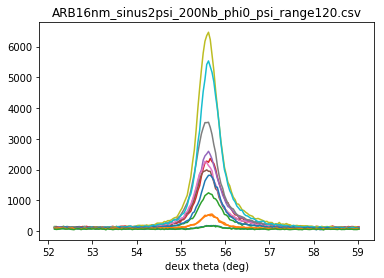

In [63]:
# Load data
filename = 'ARB16nm_sinus2psi_200Nb_phi0_psi_range120.csv'
data = np.genfromtxt(filename, skip_header=33, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

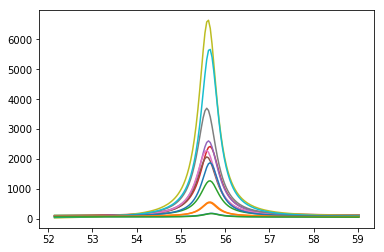

In [64]:
fitted_pos = []
intensites = []
for k, psi in enumerate(psi_span):
    x0, largeur, fitted_function = fit_peak(deux_theta_span, I[k, :])
    plt.plot(deux_theta_span, fitted_function(deux_theta_span))
    intensites.append(fitted_function(x0))
    fitted_pos.append(x0)

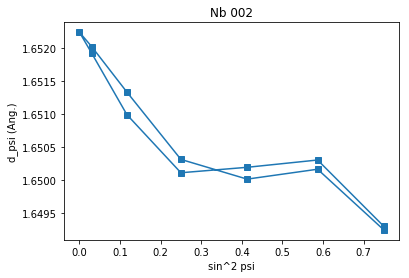

In [52]:
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Nb 002');

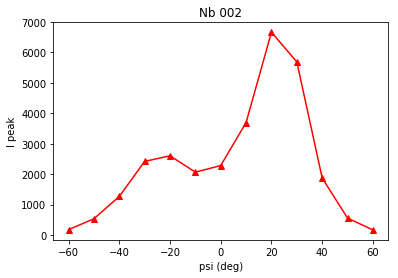

In [67]:
plt.plot(psi_span, intensites, '^-r');
plt.xlabel('psi (deg)'); plt.ylabel('I peak');
plt.title('Nb 002');

In [13]:
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 130e9, 0.35  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

sigma plan ~ 232 MPa


## ARB16nm_sinus2psi_Nb112_Cu220

    Cu220   74.1257°
    Nb211   69.5951°

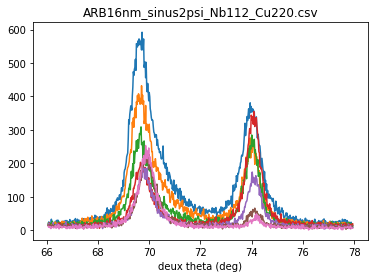

In [68]:
# Load data
filename = 'ARB16nm_sinus2psi_Nb112_Cu220.csv'
data = np.genfromtxt(filename, skip_header=33, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

sigma plan ~ 376 MPa


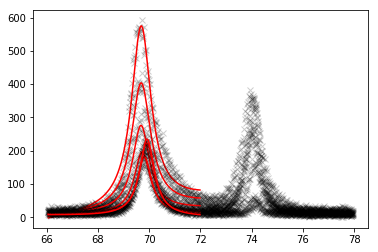

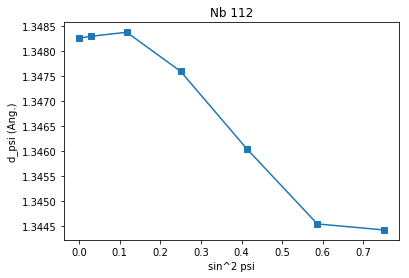

In [70]:
# Nb 112
plt.figure();
fitted_pos = []
intensites = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)
    
    mask = deux_theta_span < 72
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak)
    plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
    intensites.append(fitted_function(x0))
    fitted_pos.append(x0)
    
# sin2 psi
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Nb 112');

# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 130e9, 0.35  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

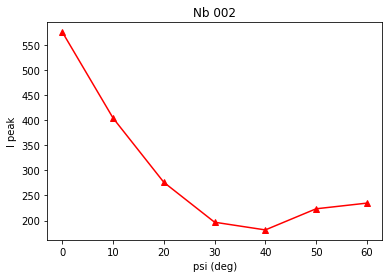

In [71]:
plt.plot(psi_span, intensites, '^-r');
plt.xlabel('psi (deg)'); plt.ylabel('I peak');
plt.title('Nb 002');

sigma plan ~ 246 MPa


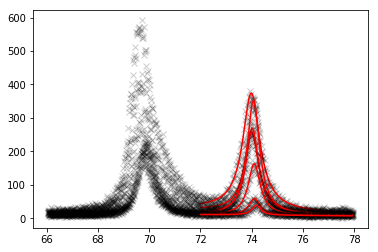

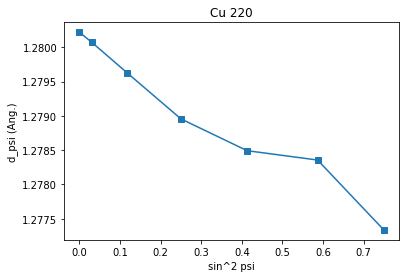

In [72]:
# Cu 220
plt.figure();
fitted_pos = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)
    
    mask = deux_theta_span > 72
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak)
    plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
    
    fitted_pos.append(x0)
    
# sin2 psi
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Cu 220');

# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 110e9, 0.343  # Pa, 1 !!!

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

In [58]:
pente_estimation

0.0038449457604953596

## LaB6

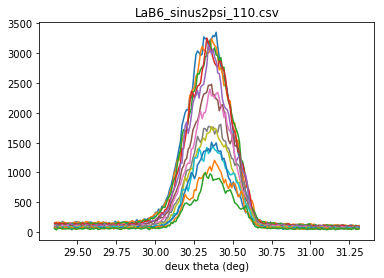

In [114]:
# Load data
filename = 'LaB6_sinus2psi_110.csv'
data = np.genfromtxt(filename, skip_header=34, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

sigma plan ~ 400 MPa


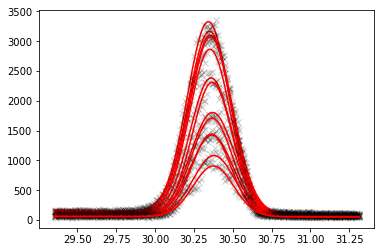

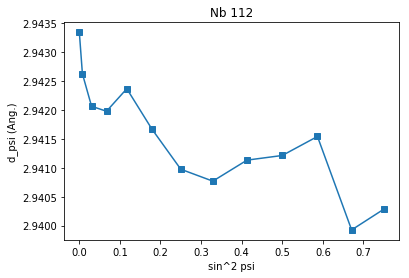

In [115]:
plt.figure();
fitted_pos = []
intensites = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)
    
    mask = deux_theta_span > 0
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak, function='Gauss')
    plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
    intensites.append(fitted_function(x0))
    fitted_pos.append(x0)
    
# sin2 psi
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Nb 112');

# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 306e9, 0.186  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

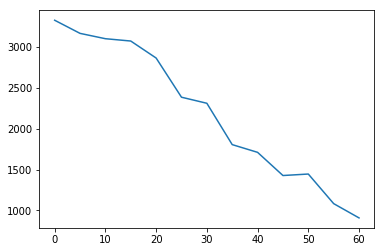

In [116]:
plt.plot(psi_span, intensites)

## PVD Si

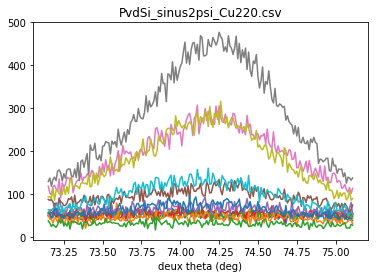

In [134]:
# Load data
filename = 'PvdSi_sinus2psi_Cu220.csv'
data = np.genfromtxt(filename, skip_header=34, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

no fit
no fit
no fit
no fit
no fit


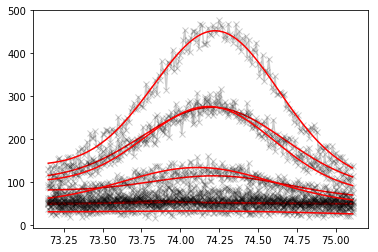

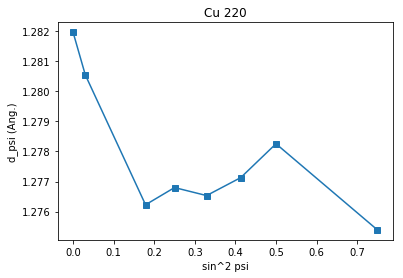

In [137]:
plt.figure();
fitted_pos, fitted_psi = [], []
intensites = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], '-xk', alpha=0.2)
    
    mask = deux_theta_span > 0
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    try:
        x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak, function='Gauss')
        plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
        intensites.append(fitted_function(x0))
        fitted_pos.append(x0)
        fitted_psi.append(psi)
    except:
        print('no fit')
    
# sin2 psi
fitted_psi = np.array(fitted_psi)
sin2psi = np.sin(fitted_psi *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)

# sin2 psi
sin2psi = np.sin(fitted_psi *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Cu 220');

In [136]:
# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 110e9, 0.35  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

sigma plan ~ 557 MPa


In [4]:
1*np.pi/180 * 320

4.1887902047863905